# CNN in Neural network

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(10,3,activation='relu',input_shape=(28,28,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(50,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))



# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(2048,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(2048,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(2048,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 50)        4550      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1250)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)             

In [5]:
# train the cnn along with the validation data
history = cnn_model.fit(Xtrain,ytrain,epochs=100,validation_data=(Xtest,ytest))

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_ac

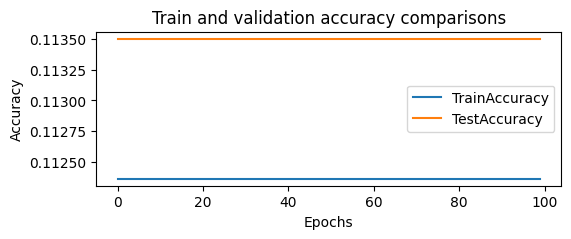

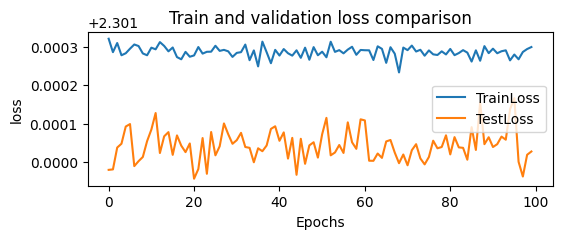

In [6]:
import matplotlib.pyplot as plt

plt.figure(1,(6,2))
plt.plot(history.epoch,history.history['accuracy'],label='TrainAccuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label='TestAccuracy')
plt.title('Train and validation accuracy comparisons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(2,(6,2))
plt.plot(history.epoch,history.history['loss'],label='TrainLoss')
plt.plot(history.epoch,history.history['val_loss'],label='TestLoss')
plt.title('Train and validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()